# Numerical Differentiation


Source [Course Home Page](https://hmanikantan.github.io/ECH60/)

<a id='fd'></a>



## (8.1) Finite Differences




### Derivatives from discrete points

Given the function $y=t^3$, can we *numerically* find the derivative at a point $t=2$? We know from calculus that the *exact* derivative is $y'=3t^2$ and so $y'(2)=12$. 

Let's first create a python function corresponding to $y(t)$:

In [16]:
import numpy as np

y=lambda t: t**3 # create function

A good starting point is the calculus definition of the derivative of a *continuous* function $y(t)$ at a time $t=a$ (so that $a=2$) in the example above:

$$ y'(a)=\left. \frac{dy}{dt} \right|_{t=a}  = \lim_{t \to a} \frac{y(t)-y(a)}{t-a} $$


This idea gives rise to what are called **finite differences**. At a *discrete* point in time $t_i$, we can approximate the derivative of $y$ as 

$$ y'(t_i)=\left. \frac{dy}{dt} \right|_{t=t_i} = \frac{y(t_{i+1})-y(t_i)}{t_{i+1}-t_i} $$

Our current time is $t_i=2$, and we are free to choose any future time $t_{i+1}$. Let's try a few cases:
# DONE

In [12]:
# forward difference

# dt is difference between current and next time
dt=1
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=1:',dydt)

dt=0.5
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=0.5:',dydt)

dt=0.1
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=0.1:',dydt)

dt=0.01
dydt=(y(2+dt)-y(2))/dt
print('approximate derivative for dt=0.01:',dydt)

approximate derivative for dt=1: 19.0
approximate derivative for dt=0.5: 15.25
approximate derivative for dt=0.1: 12.61000000000001
approximate derivative for dt=0.01: 12.060099999999707


# DONE
In this case, we happen to know that the exact value is 12, so it seems a smaller time 'step' forward gives a more accurate estimate. 

This formula is called the **forward difference** as it approximates the derivative at a point using information from that point and a point ahead of it.

We can instead use information from a point behind the current point to generate a **backward difference** formula:

$$ y'(t_i)=\left. \frac{dy}{dt} \right|_{t=t_i} = \frac{y(t_{i})-y(t_{i-1})}{t_{i}-t_{i-1}} $$

Or, we can use information from both neighbors and skip the current point to generate a **central difference** formula:

$$ y'(t_i)=\left. \frac{dy}{dt} \right|_{t=t_i} = \frac{y(t_{i+1})-y(t_{i-1})}{t_{i+1}-t_{i-1}} $$

Let's compare all three $dt$ for three different time gaps
- $dt=t_{i+1}-t_{i}$ for forward
- $dt=t_{i}-t_{i-1}$ for backward
- $dt=t_{i+1}-t_{i-1}$ for central difference
- # DONE

In [17]:

dt=1
dydt_fwd=(y(2+dt)-y(2))/dt
dydt_bwd=(y(2)-y(2-dt))/dt
dydt_cen=(y(2+dt)-y(2-dt))/(2*dt)
print('forward difference formula with dt=1 :',dydt_fwd)
print('backward difference formula with dt=1:',dydt_bwd)
print('central difference formula with dt=1 :',dydt_cen)
print("##################################")

dt=0.1
dydt_fwd=(y(2+dt)-y(2))/dt
dydt_bwd=(y(2)-y(2-dt))/dt
dydt_cen=(y(2+dt)-y(2-dt))/(2*dt)
print('\nforward difference formula with dt=0.1 :',dydt_fwd)
print('backward difference formula with dt=0.1:',dydt_bwd)
print('central difference formula with dt=0.1 :',dydt_cen)

dt=0.01
dydt_fwd=(y(2+dt)-y(2))/dt
dydt_bwd=(y(2)-y(2-dt))/dt
dydt_cen=(y(2+dt)-y(2-dt))/(2*dt)
print('\nforward difference formula with dt=0.01 :',dydt_fwd)
print('backward difference formula with dt=0.01:',dydt_bwd)
print('central difference formula with dt=0.01 :',dydt_cen)

forward difference formula with dt=1 : 19.0
backward difference formula with dt=1: 7.0
central difference formula with dt=1 : 13.0
##################################

forward difference formula with dt=0.5 : 12.61000000000001
backward difference formula with dt=0.5: 11.410000000000009
central difference formula with dt=0.5 : 12.010000000000009

forward difference formula with dt=0.1 : 12.060099999999707
backward difference formula with dt=0.1: 11.940099999999987
central difference formula with dt=0.1 : 12.000099999999847


Clearly, the central difference does a great job of approximating the derivative for each choice of time gaps $dt$. Further, a smaller $dt$ gets us closer to the actual value of 12. Do the same with another function of your choice, and see if these trends repeat.

The true power of finite differences arises in that we can do the same trick for any set of independent and dependent data, even without knowing the functional relationship between the two! 

For example, the following code generates $\sin(x)$ from $x=0$ to $10$ using `np.arange`, finds approximate derivatives using finite differences, and plots it againts the actual derivative $\cos(x)$. :

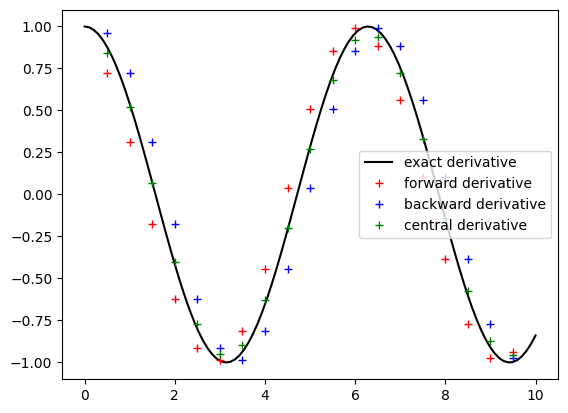

In [14]:
# spacing between x points
dx=0.5

x=np.arange(0,10+dx,dx)
y=np.sin(x)

dydx_fwd=(y[2:]-y[1:-1])/dx
dydx_bwd=(y[1:-1]-y[:-2])/dx
dydx_cen=(y[2:]-y[:-2])/(2*dx)

# exact derivative using a smooth function
xx=np.linspace(0,10,100)

import matplotlib.pyplot as plt
plt.plot(xx,np.cos(xx),'k-',label='exact derivative') 

# our approximations
plt.plot(x[1:-1],dydx_fwd,'r+',label='forward derivative')
plt.plot(x[1:-1],dydx_bwd,'b+',label='backward derivative')
plt.plot(x[1:-1],dydx_cen,'g+',label='central derivative')

plt.legend()
plt.show()

### Food for thought
Would our finite difference formulas depend on the 'grid spacing', which is the difference between consecutive $x$ entries? Remember that the continuous limit requires the points to be as small as possible: the derivative is really defined as the limiting case when the two points approach each other! Create a finer grid spacing above (try `dx=0.25`, `dx=0.1`, ...) to mimic this effect and see if our numerical approximations get closer to the exact derivative.

You should notice two things again:
* the error relative to the exact line reduces with smaller spacing $dx$ between points. This means, when possible, use a finer resolution of the independent variable
* for a given gap size $dx$, the central difference does a better job of approximating the derivative.

Notice that `func_deriv` is written in a vectorized format. This means we can input a vector or a range of values for $a$ and get all derivative values simultaneously:

Try different functions $f(x)$ above. For example, try $y(x)=(x^2-x^3+5)/(x^3+1)$ or $y(x)=e^{-x^2/10}\cos(x)$. When the exact derivative can be found by hand, compare to ensure central differences give acccurate results. Remember that reducing the spacing $h$ reduces error by $h^2$. So we can get far more accurate by choosing smaller spacing between neighboring points.